Monte Carlo Simulation to Predict Data

Install YahooFinance for downloading financial data

In [ ]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.4 MB 7.6 MB/s 
     |████████████████████████████████| 62 kB 1.6 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


Import the libraries

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm


Here, we are only intereted in plotting the McDonalds stock price over the last 5 years

In [ ]:
MCD=yf.Ticker("MCD")
print(MCD.info)

{'zip': '60607', 'sector': 'Consumer Cyclical', 'fullTimeEmployees': 100000, 'longBusinessSummary': "McDonald's Corporation operates and franchises McDonald's restaurants in the United States and internationally. Its restaurants offer hamburgers and cheeseburgers, chicken sandwiches and nuggets, wraps, fries, salads, oatmeal, shakes, desserts, sundaes, soft serve cones, bakery items, soft drinks, coffee, and beverages and other beverages, as well as breakfast menu, including biscuit and bagel sandwiches, breakfast burritos, hotcakes, and other sandwiches. As of December 31, 2021, the company operated 40,031 restaurants. McDonald's Corporation was founded in 1940 and is headquartered in Chicago, Illinois.", 'city': 'Chicago', 'phone': '630 623 3000', 'state': 'IL', 'country': 'United States', 'companyOfficers': [], 'website': 'https://corporate.mcdonalds.com', 'maxAge': 1, 'address1': '110 North Carpenter Street', 'industry': 'Restaurants', 'ebitdaMargins': 0.50657004, 'profitMargins': 

In [ ]:
hist=MCD.history(period="5Y")

Text(0.5, 0, 'Year')

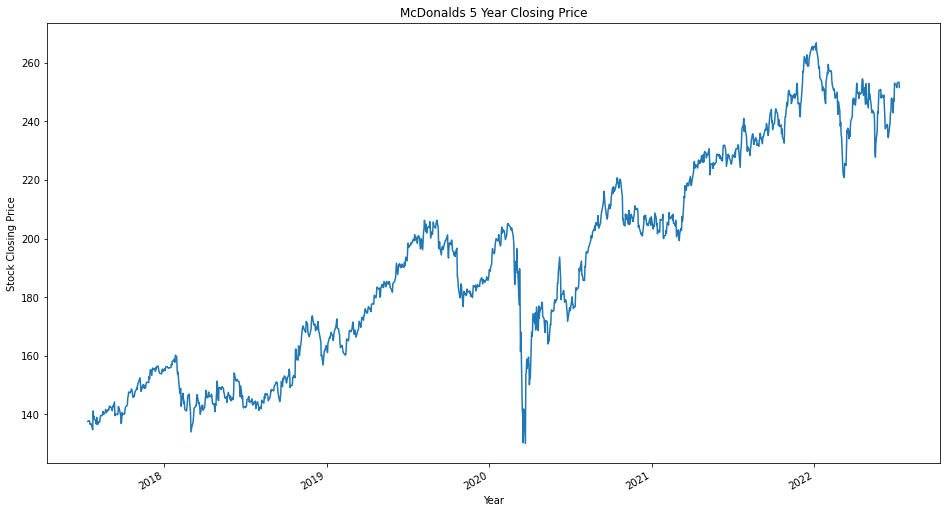

In [ ]:
dataplot=hist['Close'].plot(figsize=(16,9))
plt.title('McDonalds 5 Year Closing Price')
plt.ylabel('Stock Closing Price')
plt.xlabel('Year')

The 2020 fall in prices can be explained by the pandemic wave, which lead to a 22% fall in revenue

We will again the McDonalds dataset, but with particular time sequence between the last 5 years. This makes taking log values easier

In [ ]:
MCD=yf.download("MCD", start='2017-01-01', end='2022-01-01')
MCD.reset_index(inplace=True)
MCD.head()

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-03,121.860001,122.000000,118.959999,119.620003,104.759354,5123800
1,2017-01-04,119.000000,119.739998,118.180000,119.480003,104.636749,3780800
2,2017-01-05,119.339996,120.199997,119.099998,119.699997,104.829422,4261100
3,2017-01-06,118.930000,121.500000,118.519997,120.760002,105.757721,4089200
4,2017-01-09,120.760002,121.059998,120.330002,120.430000,105.468735,3021800


It is crucial to change the dataframe to float format, to prevent any errors while calculating logarithm.

In [ ]:
pd.set_option('display.float_format', lambda x: '%.8f' % x)

Below, is the formula for calculating log of Adjusted Closing prices

In [ ]:
MCD["LogReturns"]=np.log(MCD['Adj Close'])-np.log(MCD['Adj Close'].shift(1))

In [ ]:
MCD.head()

,Date,Open,High,Low,Close,Adj Close,Volume,LogReturns
0,2017-01-03,121.86000061,122.00000000,118.95999908,119.62000275,104.75935364,5123800,NaN
1,2017-01-04,119.00000000,119.73999786,118.18000031,119.48000336,104.63674927,3780800,-0.00117103
2,2017-01-05,119.33999634,120.19999695,119.09999847,119.69999695,104.82942200,4261100,0.00183966
3,2017-01-06,118.93000031,121.50000000,118.51999664,120.76000214,105.75772095,4089200,0.00881635
4,2017-01-09,120.76000214,121.05999756,120.33000183,120.43000031,105.46873474,3021800,-0.00273627


We will plot the logarithmic chart of stock prices

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'LOG PLOT OF STOCK Prices')

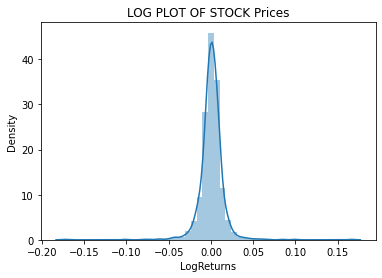

In [ ]:
sns.distplot(MCD["LogReturns"])
plt.title("LOG PLOT OF STOCK Prices")

Now, we calculate the drift.

Drift = u - 1/2(variance)^2

where

u.....is the *mean*
var....is the *variance*



In [ ]:
u=MCD["LogReturns"].mean()
var=MCD["LogReturns"].var()
drift=u-(0.5*var)

Now, we calculate the Volatity.

Volatility= Std.Dev ( as a normal function between numer of days and trials)

In [ ]:
stdev=MCD["LogReturns"].std()
days=50
trials=1259
Z=norm.ppf(np.random.rand(days,trials))  ##Volatitlity


The daily returns is a function which adds drift and volatitilty

In [ ]:
daily_returns=np.exp(drift+stdev*Z)

The Actual Monte Carlo Simulation

In [ ]:
#Here iterations are run for a range of number
price_paths = np.zeros_like(daily_returns)
price_paths[0] = MCD['Adj Close']
for t in range(1, days):
    price_paths[t] = price_paths[t-1]*daily_returns[t]


In [ ]:
new_df=pd.DataFrame(price_paths[10])  #for any given iteration

Text(0.5, 0, 'Over the Number of Days')

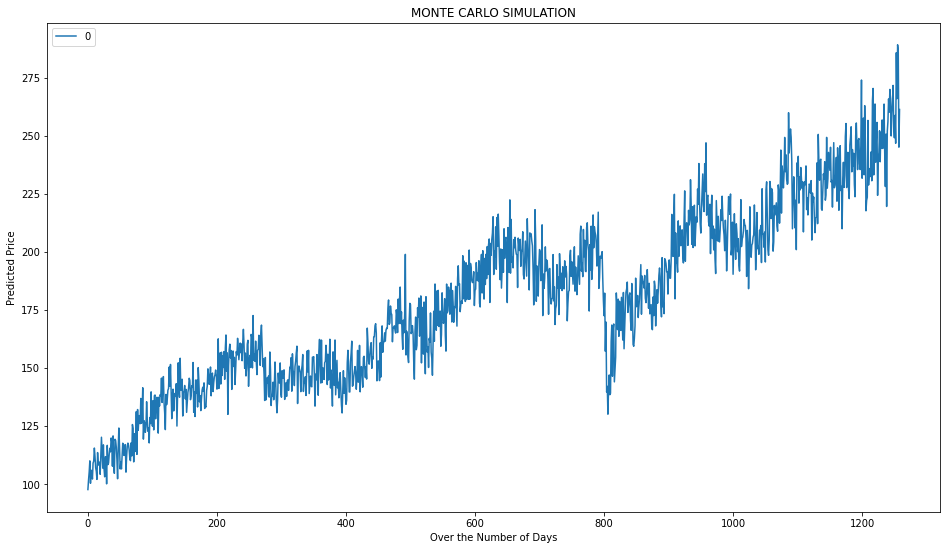

In [ ]:
final_result=new_df.plot(figsize=(16,9), title='MONTE CARLO SIMULATION')
final_result.set_ylabel("Predicted Price")
final_result.set_xlabel("Over the Number of Days")

From the graph, we can set, that McDonalds stock will steadily increase and it is a very good investment option